# BudgetProduction — Exploratory Data Analysis (EDA) and Visualization Using Python

I will be using exploratory data analysis techniques alongside visulization methods on python to provide BudgetProductions insight from a large collection of data from historical movies. I will display all of my findings using visual aids to easily understand the analysis.


# Sections
#####     0) Cleaning the data
#####     1) Does the title year have an impact on the gross earnings?
#####     2) Does the duration of the movie have an impact on gross earnings?
2b) If duration time has an impact on gross earnings then shorter movies perform worse
#####     3) Does the IMDB rating correlate with the gross earnings?
#####     4) What should be the movie genre?
2b) A hypothesis test on If the movie has a horror genre then it will obtain a better profit than a drama genre
#####     5) Conclusion


In [1]:
# Importing the large list of movie data from a CSV (Comma Separated Variable) to a file type readable for python analysis
myfile='movie_metadata.csv'
#standard imports for when working with pandas
#Initialisation of the data set and python libraries used
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import scipy as scipy
from scipy import stats
from scipy.stats import t
import statistics
from matplotlib import pyplot as plt
plt.style.use('ggplot') #added this line of code to give style to my graph

myfile = 'movie_metadata.csv'

#read the movie metadata file into a dataframe in pandas.
movies_df = pd.read_csv(myfile,index_col=None)

#use display function to show a beautiful version of the data
display(movies_df.head(5)) #first 2 movies
display(movies_df.tail(2)) #last 2 movies


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


## 0) Cleaning the data


In [2]:
#Using function method which is callable during any time of the report
def make_float_array(anylist):
    newlist=[]
    for item in anylist:
        try:
#will append every consecutive item in the dictionary into an np array
            newlist.append(float(item))
        except:
            pass
    return np.array(newlist)  

In [3]:
def corr_checker(dataframe,compare1,compare2):
    correlation_df = dataframe[[compare1,compare2]].corr()
    correlation = correlation_df.iloc[0][compare2]
    if correlation < -0.5 and correlation >= -0.8:
        print("for the correlation score {:.5f} we have moderate weak correlation".format(correlation))
    elif correlation <-0.8:
        print("for the correlation score {:.5f} we have strong weak correlation".format(correlation))
    elif correlation > -0.5 and correlation <= -0.3:
        print("for the correlation score {:.5f} we have low weak correlation".format(correlation))
    elif correlation >= 0.8:
        print("for the correlation score {:.5f} we have strong positive correlation".format(correlation))
    elif correlation >= 0.5 and correlation < 0.8:
        print("for the correlation score {:.5f} we have moderate positive correlation".format(correlation))
    elif correlation >= 0.3 and correlation < 0.5:
        print("for the correlation score {:.5f} we have weak positive correlation".format(correlation))
    else:
        print("With a correlation of {:.5f} we can conclude that there is no correlation between {} and {}".format(correlation,compare1,compare2))

In [4]:
movies_df.drop(["num_critic_for_reviews","country","language","num_user_for_reviews","director_facebook_likes","actor_3_facebook_likes","actor_2_name","actor_3_name","movie_imdb_link","actor_2_facebook_likes"], inplace=True,axis=1)
movies_clean_df = movies_df


In [5]:
movies_clean_df.drop_duplicates(inplace=True)

In [6]:
movies_clean_df = movies_clean_df[movies_clean_df["gross"].notna()]
#Cleaning the dataframe so that the movies we have do not have a null component in the "gross"-because a return is what we analyse
movies_clean_df.isnull().sum()

color                          2
director_name                  3
duration                       2
actor_1_facebook_likes         4
gross                          0
genres                         0
actor_1_name                   4
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster           7
plot_keywords                 40
content_rating                64
budget                       267
title_year                     3
imdb_score                     0
aspect_ratio                 104
movie_facebook_likes           0
dtype: int64

Above shows the empty inputvalues, these need to be removed to make the data analysis more legible such tha this does not mess with the final outcome of the report. The DataFrame was cleaned to allow easier readability. Removed irrelevant columns including : "num_critic_for_reviews","country","language","num_user_for_reviews","director_facebook_likes","actor_3_facebook_likes","actor_2_name","actor_3_name","movie_imdb_link","actor_2_facebook_likes".

I believe that these will not tell us anything nor allow me to make any viable recomendations on suitability for the movie.

Immediately, from the specification we are only interested in movies that have a maximum budget of £1.5 million. From here, I have analysed if the year that the movie came out had an effect on the gross earnings.

In [7]:
budget_movies_df = movies_clean_df[movies_clean_df["budget"] < 1500000]

# Only interested in the movies that have a budget < 1.5 million

In [8]:
budget_movies_df =budget_movies_df.assign(profit = budget_movies_df.gross - budget_movies_df.budget)
#creates a new column called profit which is the respective difference of gross and budget
display(budget_movies_df)

,color,director_name,duration,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,profit
1281,Color,Martin Scorsese,112.0,22000.0,32645.0,Crime|Drama|Romance|Thriller,Robert De Niro,Mean Streets,67797,23737,0.0,bar|catholic guilt|epilepsy|italian american|m...,R,500000.0,1973.0,7.4,1.85,0,-467355.0
2242,Black and White,Alfred Hitchcock,108.0,606.0,32000000.0,Horror|Mystery|Thriller,Janet Leigh,Psycho,422432,1885,2.0,money|motel|rain|shower|theft,R,806947.0,1960.0,8.5,1.85,18000,31193053.0
2420,Color,John Carpenter,89.0,2000.0,21378000.0,Fantasy|Horror,Jamie Lee Curtis,The Fog,46492,4877,0.0,california|fog|leper|lighthouse|ship,R,1000000.0,1980.0,6.8,2.35,7000,20378000.0
2492,Color,John Carpenter,101.0,2000.0,47000000.0,Horror|Thriller,Jamie Lee Curtis,Halloween,157857,4400,0.0,halloween|masked killer|michael myers|slasher|...,R,300000.0,1978.0,7.9,2.35,12000,46700000.0
3278,Color,Tobe Hooper,88.0,383.0,30859000.0,Horror|Thriller,Gunnar Hansen,The Texas Chain Saw Massacre,96410,1094,0.0,cannibal|chainsaw|hitchhiker|independent film|...,R,83532.0,1974.0,7.5,1.85,0,30775468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Color,Shane Carruth,77.0,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,368,0.0,changing the future|independent film|invention...,PG-13,7000.0,2004.0,7.0,1.85,19000,417760.0
5034,Color,Neill Dela Llana,80.0,0.0,70071.0,Thriller,Ian Gamazon,Cavite,589,0,0.0,jihad|mindanao|philippines|security guard|squa...,Not Rated,7000.0,2005.0,6.3,NaN,74,63071.0
5035,Color,Robert Rodriguez,81.0,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,0.0,assassin|death|guitar|gun|mariachi,R,7000.0,1992.0,6.9,1.37,0,2033920.0
5037,Color,Edward Burns,95.0,296.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,690,1.0,written and directed by cast member,Not Rated,9000.0,2011.0,6.4,NaN,413,-4416.0


## Section 1 : Does the title year have an impact on the gross earnings?

In [9]:
year_earnings_df = budget_movies_df[["gross","title_year"]]
#For instances where the title year OR gross earnings do not have a value we drop the entire row
year_earnings_df = year_earnings_df.dropna()
year_earnings_df.isnull().sum() 
#below we see there are 0 for both columns and we can explore further

gross         0
title_year    0
dtype: int64

Here to answer the question "Is there a correlation between Title Year and Gross earnings?" When analyzing the distribution of the two requirements in the data, there seems to be no correlation between the two. In the cell below I have used my defined function for correlation which outputs a Pearson correlation coefficient.

In [10]:
corr_checker(year_earnings_df,"title_year","gross")

With a correlation of -0.19464 we can conclude that there is no correlation between title_year and gross


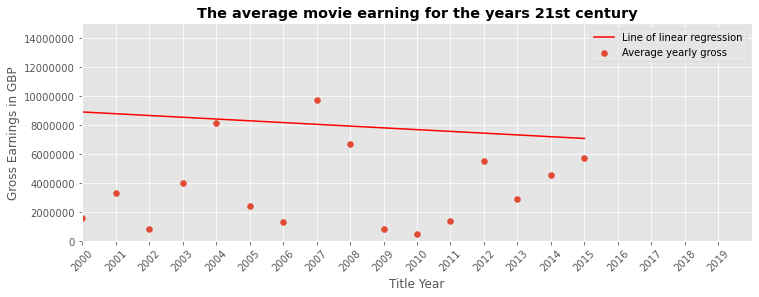

In [11]:
#here I group the columns of my DataFrame by title year with the gross column and the corresponding mean for each year
year_earnings_df = year_earnings_df.groupby("title_year")["gross"].mean().reset_index() #reset the index otherwise unplottable
fig,ax1=plt.subplots(figsize=(12,4)) # matplotlib function to create scatter plot - here i make it more horizontal
#Below I add a "grid" this is because the plot is wide. 
#With the added grid it makes it easier to read off the values near the end of the plot.
ax1.yaxis.grid(True,linestyle="-")
plt.scatter(year_earnings_df["title_year"],year_earnings_df["gross"])
plt.xlabel("Title Year")
plt.ylabel("Gross Earnings in GBP")
plt.ticklabel_format(style='plain')#code removes the scientific notation in the y axis
plt.ylim(0,15000000)
plt.xlim(2000,2020)
plt.xticks(np.arange(2000,2020,1),rotation = 45) #rotation here to make the xaxis easier to read
plt.title("The average movie earning for the years 21st century",fontweight = "bold")
# below is a builtin feature of numpy to plot the linear regression line
m, b = np.polyfit(year_earnings_df["title_year"], year_earnings_df["gross"],1)
plt.plot(year_earnings_df["title_year"], m*year_earnings_df["title_year"]+b,"r")
#the legend code creates a "key" 
plt.legend(["Line of linear regression","Average yearly gross"])
plt.show()

Given that historically movies tend to have a slightly worse gross than the preceding years, there is **no need to worry** as utilising the information found further in this report I am able to give specific recommendations to outperform your last comedy-action-thriller movie.

## Section 2) Does the duration of the movie have an impact on gross earnings?

In [12]:
print("Exploration of the movies run time compared to the gross earnings requires some data filtering. This includes all no input values for the duration and the earnings. I complete this task in the next few lines. Here the budget data frame is used again to comply with the specification.")

Exploration of the movies run time compared to the gross earnings requires some data filtering. This includes all no input values for the duration and the earnings. I complete this task in the next few lines. Here the budget data frame is used again to comply with the specification.


In [13]:
duration_earnings_df = budget_movies_df[["duration","gross"]]
duration_earnings_df = duration_earnings_df.dropna()
duration_earnings_df.isnull().sum() # checking that all empty cells are removed -> output proves this.

duration    0
gross       0
dtype: int64

In [14]:
print("The amount of movies :",len(duration_earnings_df["duration"]))
print("Minimum movie duration :",duration_earnings_df["duration"].min())
print("Maximum movie duration :",duration_earnings_df["duration"].max())
print("Mean movie duration :",duration_earnings_df["duration"].mean())
print("Standard deviation of movie duration :",duration_earnings_df["duration"].std())
print("Median movie duration :",duration_earnings_df["duration"].median())

The amount of movies : 254
Minimum movie duration : 34.0
Maximum movie duration : 215.0
Mean movie duration : 95.03937007874016
Standard deviation of movie duration : 15.85677076356567
Median movie duration : 92.0


In [15]:
 # reset the index to easily find the lower and upper quartile.
duration_earnings_df = duration_earnings_df.sort_values(by= ["duration"], ascending = True).reset_index()
duration_earnings_df = duration_earnings_df.drop("index",1)
display(duration_earnings_df)
lq= np.percentile(duration_earnings_df["duration"],25)
print(lq)
uq= np.percentile(duration_earnings_df["duration"],75)
print(uq)

,duration,gross
0,34.0,333658.0
1,53.0,274661.0
2,65.0,8231.0
3,72.0,4914.0
4,75.0,203134.0
...,...,...
249,145.0,117235247.0
250,148.0,24475416.0
251,167.0,610991.0
252,170.0,7830611.0


87.0
101.0


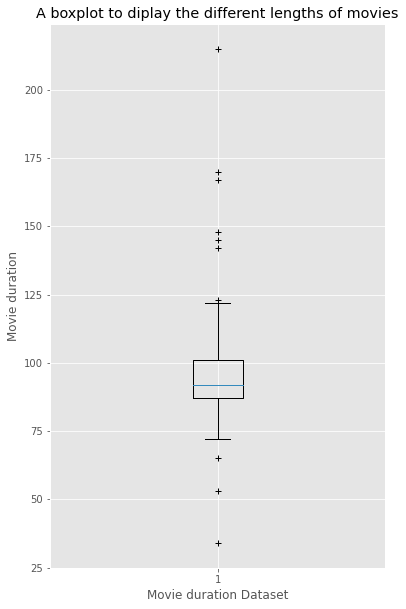

In [16]:
listof_durations = make_float_array(duration_earnings_df["duration"])
#using the function defined in section 0 as an easy method for making lists
fig,ax1=plt.subplots(figsize=(6,10))
ax1.yaxis.grid(True,linestyle='-',)
plt.boxplot(listof_durations,sym='+',whis=1.5)
plt.ylabel('Movie duration')
plt.xlabel('Movie duration Dataset')
plt.title('A boxplot to diplay the different lengths of movies')
plt.show()

From the above representation, we can see that the "bulk" of movies lie between the two marked quartiles which close off the "box" plot. The two extended lines are the "whiskers" which indicated respectively a value of lower quartile - 1.5* Inter Quartile Range and upper quartile + 1.5* Inter Quartile Range. This data set is vastly distributed, below I examine the correlation between movie duration and gross earnings to see if there is an impact.

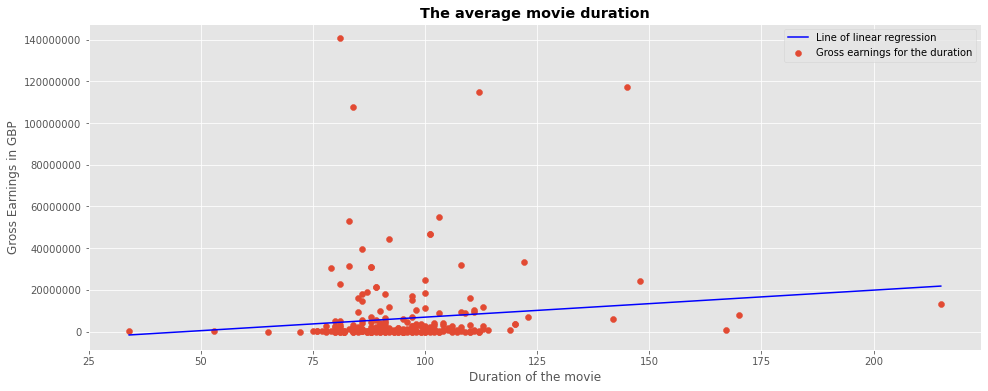

In [17]:
fig,ax1=plt.subplots(figsize=(16,6))
#Below I add a "grid" this is because the plot is wide. 
#With the added grid it makes it easier to read off the values near the end of the plot.
ax1.yaxis.grid(True,linestyle="-")
plt.scatter(duration_earnings_df["duration"],duration_earnings_df["gross"])
plt.xlabel("Duration of the movie")
plt.ylabel("Gross Earnings in GBP")
plt.ticklabel_format(style='plain')
plt.title("The average movie duration",fontweight = "bold")
# below is a builtin feature of numpy to plot the linear regression line
m, b = np.polyfit(duration_earnings_df["duration"], duration_earnings_df["gross"],1)
plt.plot(duration_earnings_df["duration"], m*duration_earnings_df["duration"]+b,"b")
plt.legend(["Line of linear regression","Gross earnings for the duration"])
plt.show()

The above plot shows all the durations plotted against the gross earnings. There seems to be a correlation. However it does **not** have outliers removed and this will impact the analysis. Bellow, I have removed the outliers and looked at the bulk of the data. The below information does not infer any correlation between the duration of movies and gross earnings.

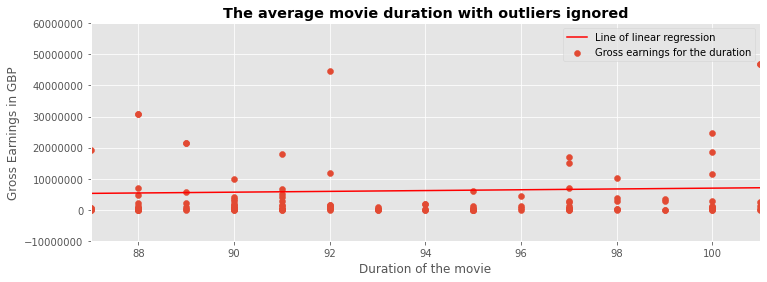

In [18]:
fig,ax1=plt.subplots(figsize=(12,4))
#Below I add a "grid" this is because the plot is wide. 
#With the added grid it makes it easier to read off the values near the end of the plot.
ax1.yaxis.grid(True,linestyle="-")
plt.scatter(duration_earnings_df["duration"],duration_earnings_df["gross"])
plt.xlabel("Duration of the movie")
plt.ylim(-10000000,60000000)
plt.xlim(np.percentile(duration_earnings_df["duration"],25),np.percentile(duration_earnings_df["duration"],75))
plt.ylabel("Gross Earnings in GBP")
plt.ticklabel_format(style='plain')
plt.title("The average movie duration with outliers ignored",fontweight = "bold")
# below is a builtin feature of numpy to plot the linear regression line
m, b = np.polyfit(duration_earnings_df["duration"], duration_earnings_df["gross"],1)
plt.plot(duration_earnings_df["duration"], m*duration_earnings_df["duration"]+b,"r")
plt.legend(["Line of linear regression","Gross earnings for the duration"])
plt.show()

## Section 2b) A hypothesis test on If the movie duration has an impact on gross earnings then shorter movies obtain a worse return

Splitting the data into two sets, the first set X1 has movies of length < the median and the second has movies of length > median. A random sample from these two data sets will ensure that we have an unbiased fair spread of the data. The sample size will be 30 which is sufficient to utilize the Central Limit Theorem (the random distributions follow a normal distribution) and also a sufficient sample size to ensure that we can compare the two using the student T-test. A Student-t test is used on this data sample to give us a 95% confidence of a change of earnings for different movie lengths.

In [19]:
#Splitting the data frame into two sides, this is to ensure we have two
#RANDOM samples taken to compare their means.
first_half = duration_earnings_df[0:127]
second_half = duration_earnings_df[127:-1]

In [20]:
print("The mean duration of the first half of movies =",first_half["duration"].mean())
print("The mean duration of the second half of movies =",second_half["duration"].mean())
print("The mean gross of the first half of movies =",first_half["gross"].mean())
print("The mean gross of the second half of movies =",second_half["gross"].mean())

The mean duration of the first half of movies = 85.15748031496064
The mean duration of the second half of movies = 104.04761904761905
The mean gross of the first half of movies = 5995775.039370079
The mean gross of the second half of movies = 6564350.428571428


I present the following hypothesis test : $$ Null: H_0 : \mu_A = \mu_B$$
$$ Alternative: H_1 : \mu_A > \mu_B$$

$$t = \frac{(\bar{X_A} - \bar{X_B}) + (\mu_A - \mu_B)}{\sqrt{ \frac{S^2}{n_A} + \frac{S^2}{n_B} }}$$

From the calculations above and our two sample means are $\bar{X_A}$ and $X_B$, testing on the hypothesis $\mu_A$ and $\mu_B$ are equal which leads to the following used formula:
$$t = \frac{(\bar{X_A} - \bar{X_B})}{\sqrt{ \frac{S_A^2}{n_A} + \frac{S_B^2}{n_B} }}$$

We are going to perform a one tailed 95% confidence test which gives our $\alpha = 0.05$

In [21]:
second_half_std = second_half["gross"].std() #built in std function to find standard deviation
first_half_std = first_half["gross"].std()
numerator= second_half["gross"].mean() - first_half["gross"].mean() #from formula above
denominator = (((second_half_std**2)/len(second_half))+((first_half_std**2)/len(first_half)))**0.5 #from formula above

In [22]:
statistic= numerator/denominator
print("Our t value from this statistic: {:.4f}".format(statistic))
scipy.stats.ttest_ind(second_half["gross"],first_half["gross"]) #scipy used to fin p value from t value
print("This has a corresponding p value {:.4f}".format(1-scipy.stats.ttest_ind(second_half["gross"],first_half["gross"])[-1]))
# built in scipy function for t-tests.


Our t value from this statistic: 0.2608
This has a corresponding p value 0.2055


A t-test on the first and last quarter of the movies are calculated below:

In [23]:
first_quarter = duration_earnings_df[0:64]
last_quarter = duration_earnings_df[3*64:]

In [24]:
print("mean duration of the first quarter:", first_quarter["duration"].mean())
print("mean duration of the last quarter: ",last_quarter["duration"].mean())
print("mean gross earnings for first quarter: ",first_quarter["gross"].mean())
print("mean gross earnings for the last quarter:",last_quarter["gross"].mean())
last_quarter_std = last_quarter["gross"].std()
first_quarter_std = first_half["gross"].std()
numerator= last_quarter["gross"].mean() - first_quarter["gross"].mean()
denominator = (((last_quarter_std)/len(last_quarter))+((first_quarter_std)/len(first_quarter))**0.5)

mean duration of the first quarter: 80.796875
mean duration of the last quarter:  113.61290322580645
mean gross earnings for first quarter:  8679539.828125
mean gross earnings for the last quarter: 10172267.032258065


In [25]:
statistic= numerator/denominator
print("Our t value from this statistic: {:.4f}".format(statistic))
scipy.stats.ttest_ind(last_quarter["gross"],first_quarter["gross"])
print("This has a corresponding p value {:.4f}".format(1-scipy.stats.ttest_ind(last_quarter["gross"],first_quarter["gross"])[-1]))
# built in scipy function for t-tests.


Our t value from this statistic: 4.0314
This has a corresponding p value 0.2810


Clearly for both variations of splitting the data, the p value is much greater than the 95% confidence interval. Hence $ p value> \alpha = 0.05$
Therefore there is insufficient evidence to reject the null hypotheses. Thus we conclude that the movie duration has no effect on the gross return on movies and therefore it doesn't matter how long the movie is as shorter movies can return just as much as longer movies.

## Section 3) Does IMDB score correlation with gross earnings?

We want to see if lower scoring IMDB movies have a lower realised profit

In [26]:
print("Number of budget movies ",len(budget_movies_df)) # Tells us how many movies we have
#Checking how many movies made a profit
profit_made_df = (budget_movies_df[budget_movies_df["profit"] > 0])
print("Number of profited budget movies ",len(profit_made_df))
print("Out of the {} movies made within our budget, {} had a profitable return. This is means {}% of movies made a return".format(
    len(budget_movies_df),len(profit_made_df),int(100*(len(profit_made_df)/len(budget_movies_df)))))

Number of budget movies  254
Number of profited budget movies  146
Out of the 254 movies made within our budget, 146 had a profitable return. This is means 57% of movies made a return


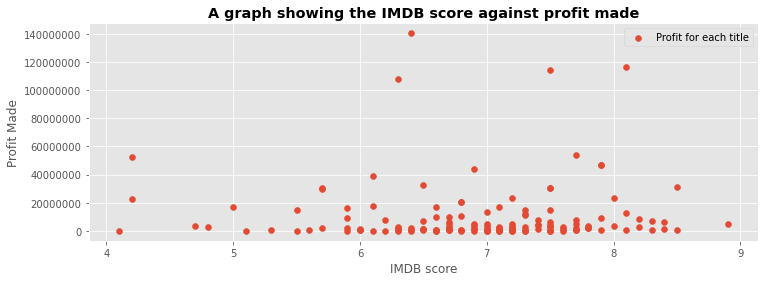

In [27]:
fig,ax2=plt.subplots(figsize=(12,4)) #More horizontal graph
plt.scatter(profit_made_df["imdb_score"],profit_made_df["profit"])
plt.xlabel("IMDB score")
plt.ylabel("Profit Made")
plt.title("A graph showing the IMDB score against profit made",fontweight = "bold")
#code below removes the scientific notation in the y axis
plt.ticklabel_format(style='plain')
#the legend code creates a "key" since there is only 1 thing plotted this only has one attribute
plt.legend(["Profit for each title"])
plt.show()

In [28]:
corr_checker(profit_made_df,"imdb_score","profit")


With a correlation of -0.00737 we can conclude that there is no correlation between imdb_score and profit


## Section 4) Genre Analysis

Since in the last section, It is clear that for movies in our budget, the IMDB score does not correlate with profit and hence I have not filtered the following analysis with a minimum IMDB score. Only by budget I find which genres were the most successful.

In [29]:
genre_movies_df = budget_movies_df[["genres","profit"]]
groupedgenres_df = genre_movies_df.groupby("genres").mean().sort_values("profit",ascending = False)
display(groupedgenres_df)


,profit
genres,
Comedy|Drama|Music,6.116150e+07
Horror,4.512257e+07
Adventure|Family|Romance,3.905260e+07
Horror|Thriller,3.552175e+07
Horror|Mystery|Thriller,3.338344e+07
...,...
Action|Comedy|Fantasy|Sci-Fi,-9.870040e+05
Comedy|Drama|Sci-Fi,-9.936130e+05
Sci-Fi|Thriller,-1.043871e+06


From the above representation of the data which was obtained by grouping, all of the genres together **104 unique genres** and then finding their mean profit using the built-in function.
The mean for this instance for each individual profit value $p_i$ is == $$ mean = \sum_i^n \frac{p_i}{n}$$

The "head" (top 5 performing genres) and "tail (worst 5 performing genres) are displayed. This indicates that the most profitable movie style to choose is that of a comedy, drama, music storyline. With the worst average performance from a movie that is based on an adventure, comedy, horror.

Next, I will look at the movie genres without grouping them to find the actual worst and best performing movies and use a statistical hypothesis test to determine if they do perform better or worse with a significance value.

In [30]:
genre_movies_df=genre_movies_df.sort_values(by= ["profit"], ascending = False).reset_index()
genre_movies_df = genre_movies_df.drop("index",1)

In [31]:
display(genre_movies_df)

,genres,profit
0,Horror,140470114.0
1,Drama|Sport,116275247.0
2,Comedy|Drama|Music,114223000.0
3,Horror,107902283.0
4,Horror|Mystery|Thriller,53953403.0
...,...,...
249,Comedy|Documentary,-1192174.0
250,Comedy|Drama,-1196170.0
251,Comedy|Drama,-1288722.0
252,Adventure|Comedy|Horror,-1363170.0


## Section 2b) A hypothesis test on If the movie has a horror genre then it will obtain a better profit than a drama genre

In [32]:
boolean_findings= genre_movies_df["genres"].str.contains("Drama")
print(boolean_findings[2])

horror_sum = 0
horror_count= 0
horror_data= []
for i in range(len(genre_movies_df)):
    if genre_movies_df["genres"].str.contains("Horror")[i] == True:
        horror_count +=1
        horror_sum += genre_movies_df["profit"][i]
        horror_data.append(genre_movies_df["profit"][i])

drama_sum = 0
drama_count= 0
drama_data = []
for i in range(len(genre_movies_df)):
    if genre_movies_df["genres"].str.contains("Drama")[i] == True:
        drama_count +=1
        drama_sum += genre_movies_df["profit"][i]
        drama_data.append(genre_movies_df["profit"][i])

True


In [33]:
mean_horror = horror_sum/horror_count
mean_drama = drama_sum/drama_count
stdhorror = statistics.stdev(horror_data)
stddrama = statistics.stdev(drama_data)
print("The mean profit of horror movies is GBP" , int(mean_horror))
print("The mean profit of drama movies is GBP" , int(mean_drama))
print("The standard deviation of horror movies is" , int(stdhorror))
print("The standard deviation of drama movies is" , int(stddrama))


The mean profit of horror movies is GBP 18784692
The mean profit of drama movies is GBP 4016951
The standard deviation of horror movies is 29860693
The standard deviation of drama movies is 14410455


I present the following hypothesis test : where $\mu_A$ = mean profit for horror and $\mu_B$ = mean profit for drama $$ Null: H_0 : \mu_A = \mu_B$$
$$ Alternative: H_1 : \mu_A > \mu_B$$

$$t = \frac{(\bar{X_A} - \bar{X_B}) + (\mu_A - \mu_B)}{\sqrt{ \frac{S^2}{n_A} + \frac{S^2}{n_B} }}$$

From the calculations above and our two sample means are $\bar{X_A}$ and $X_B$, testing on the hypothesis $\mu_A$ and $\mu_B$ are equal which leads to the following used formula:
$$t = \frac{(\bar{X_A} - \bar{X_B})}{\sqrt{ \frac{S_A^2}{n_A} + \frac{S_B^2}{n_B} }}$$

We are going to perform a one tailed 95% confidence test which gives our $\alpha = 0.05$

In [34]:
numerator = mean_horror - mean_drama
denominator =((stdhorror/horror_count)+(stddrama/drama_count))

In [35]:
statistic = numerator/denominator
print("Our t value from this statistic: {:.4f}".format(statistic))

Our t value from this statistic: 17.4148


In [36]:
scipy.stats.t.sf(abs(statistic), horror_count + drama_count -2) #second input here is the degrees of freedome = ((n_a +n_b)-2)

9.320874761394248e-41

Clearly our p value is much less than the 95% confidence interval. Hence $ p value> \alpha = 0.05$
Thus there is sufficient evidence to reject our null hypothesis $H_0$. From this, we conclude that the movie should definitely not have a storyline that is a drama as this extremely small p-value concludes even a 99% confidence interval.

### Average gross earnings from different genres

In [43]:
#Look at the average gross earnings of different genres
data = pd.read_csv('movie_metadata.csv') #retreive the raw data 
data.drop_duplicates(inplace=True) #cleaning
data.dropna(axis=0, subset=['gross', 'budget'], inplace=True) #cleaning
data = data[data["budget"]<1500000]
movie_genres = data.genres.map(lambda x : x.split('|')) #split genres by"|"

In [38]:
#create a list to store unique genres
unique=list()
for genres in movie_genres:
    for genre in genres:
        if genre not in unique:
            unique.append(genre)

In [39]:
#create another DataFrame to represent One-hot endocing of genres for every movie
unique = np.array(unique)
genresDf = pd.DataFrame(columns=unique, index=range(len(movie_genres)))
index=0
for genres in movie_genres:
    row_values = np.zeros(len(unique)) 
    for genre in genres:
        row_values=np.add(row_values,(genre==unique).astype(int))
    genresDf.loc[index] = row_values
    index +=1

In [40]:
#Add gross and budget to dataframe
genresDf["gross"] = data.gross.values
genresDf["budget"] = data.budget.values
#Average gross for different genres
avg_gross = []
avg_budget= []
for  i in unique:
    avg_gross.append(genresDf[genresDf[i] == 1]['gross'].mean())
    avg_budget.append(genresDf[genresDf[i] == 1]['budget'].mean())

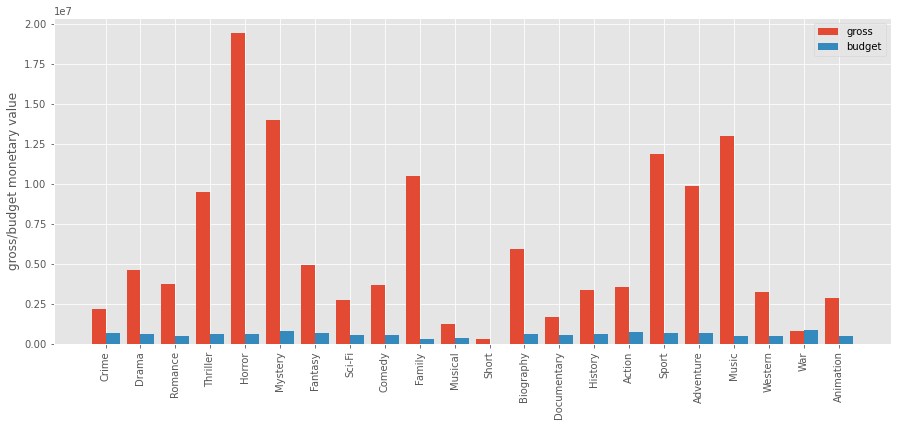

In [41]:
#plot graph
X_axis = np.arange(len(unique))
plt.figure(figsize=(15,6))
plt.bar(X_axis-0.2, avg_gross, width=0.4, label="gross")
plt.bar(X_axis+0.2, avg_budget, width=0.4, label="budget")
plt.xticks(X_axis, unique, rotation='vertical')
plt.ylabel("gross/budget monetary value")
plt.legend()
plt.show()

## Final Conclusions


In section 1 the data was cleaned and I have removed all the unnecessary columns that would spark no interest in the data analysis. I have defined functions that I have used through the report. The only movies that had a budget within our range (<1.5million) were analyzed as others are not suitable. A profit column was added to the data frame to analyze correlations between profit and other variables.

In section 1 I asked whether a movie's earnings were indicative of the release date, I visualized my findings. The plot used my correlation checker to plot the line of regression. 21st-century movies were looked at and there was no indication of a correlation between earnings and title year. This implies that we are not on a downtrend of movies performing worse over time and hence using the funds to create a movie is still a great idea!

In section 2 analyzing the duration of movies against their respective gross earnings concluded that there is still no correlation. If the budget can be used to create a short movie there is still the great potential for a highly profitable movie as my correlation checker resulted in no correlation. A final graph was generated removing the outliers found in the box and whisker diagram. This still resulted in no correlation. A statistical check for this was done to primarily concluding that for a high level of sensitivity (95%) we statistically concluded that since the probability value was way out of our range (p-vale ~ 20% , sensitivity = 5%) that movies with a short duration do not result in lower earnings.

Section 3 details the correlation between an IMDB score and the profit realized from those respective movie titles. It showed no/very weak correlation and thus it does not matter what reviewers say about the movie! It has no impact on the profit.

Section 4 - Genre Analysis. This section was by far the most intrinsically valuable section. Analysis of the movie genre data frame showed that the top-earning movie titles were of the Horror category. The absolute lowest was Drama. This leads me to perform a statistical hypothesis test on the two data sets. After this, the genres were split and a graphical visualisation of which genres had high gross returns.

In [42]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 437

import io
from nbformat import current

filepath="BudgetProductions.ipynb"
question_count=437

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

C:\Users\the-e\anaconda3\lib\site-packages\nbformat\current.py:15: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  warnings.warn("""nbformat.current is deprecated.


Submission length is 1071
